In [13]:
import pandas as pd
df = pd.read_csv('penguins.csv')
df.head(5)

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0


In [14]:
df.describe()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,0.755814
std,5.459584,1.974793,14.061714,801.954536,0.762626
min,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,39.225000,15.600000,190.000000,3550.000000,0.000000
50%,44.450000,17.300000,197.000000,4050.000000,1.000000
75%,48.500000,18.700000,213.000000,4750.000000,1.000000
max,59.600000,21.500000,231.000000,6300.000000,2.000000


In [15]:
print(df.isnull().sum())
print(df['Species'].value_counts())

df_cleaned = df.dropna()

X = df_cleaned[['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass']]
y = df_cleaned['Species']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

CulmenLength     2
CulmenDepth      2
FlipperLength    2
BodyMass         2
Species          0
dtype: int64
Species
0    152
1    124
2     68
Name: count, dtype: int64
X shape: (342, 4)
y shape: (342,)


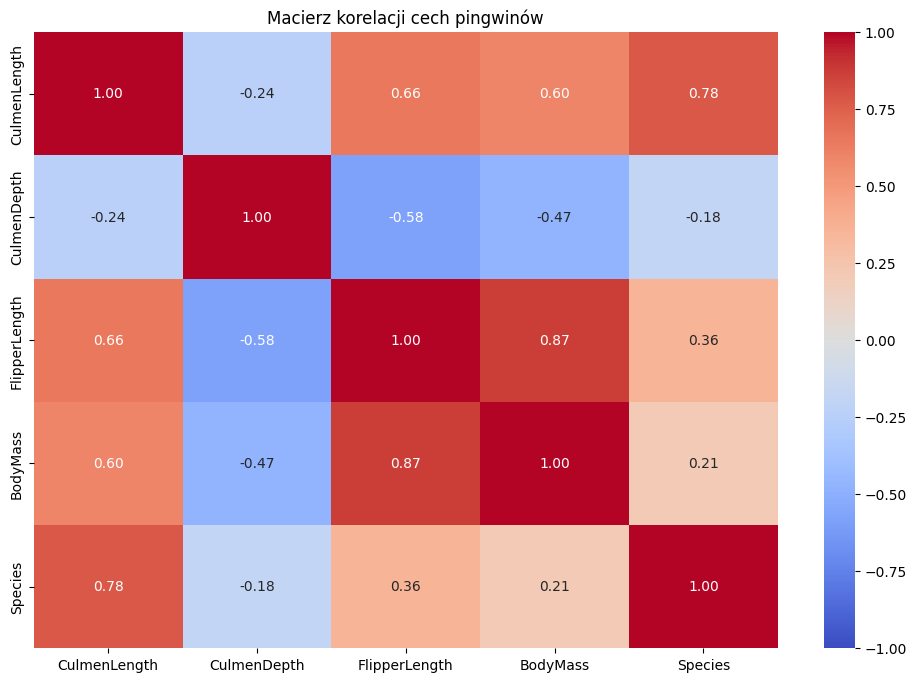

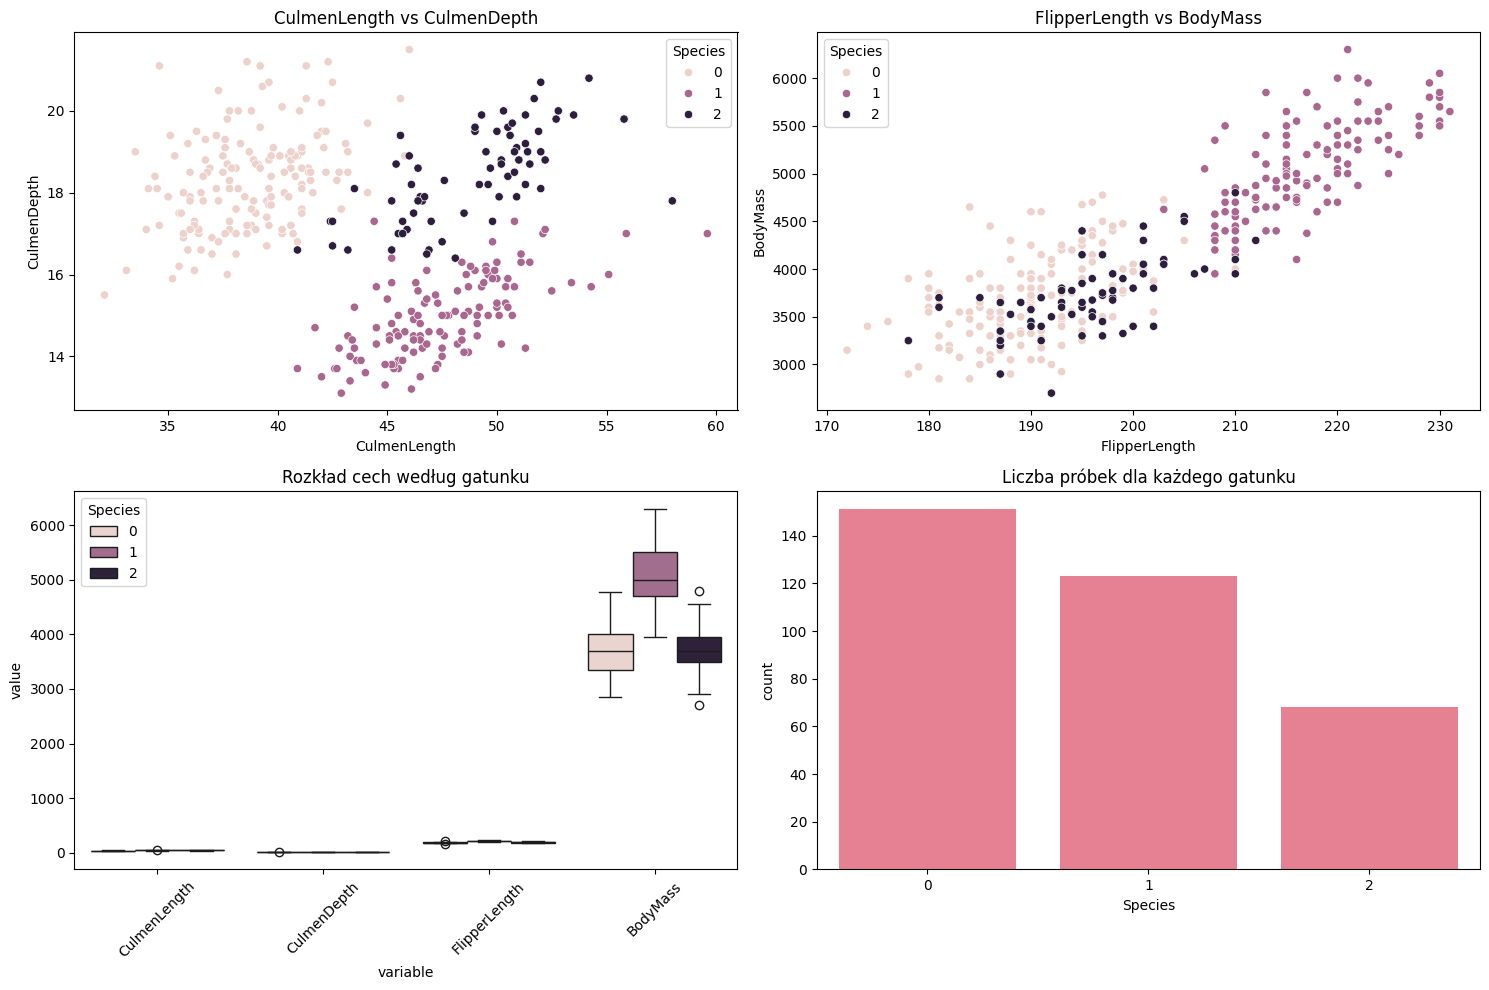

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("husl")

# Utworzenie macierzy korelacji
correlation_matrix = df_cleaned[['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass', 'Species']].corr()

# Utworzenie wykresu
plt.figure(figsize=(12, 8))

# Heatmapa korelacji
sns.heatmap(correlation_matrix, 
            annot=True,  # Pokazuje wartości korelacji
            cmap='coolwarm',  # Paleta kolorów
            vmin=-1, vmax=1,  # Zakres wartości
            center=0,  # Środek skali kolorów
            fmt='.2f')  # Format liczb (2 miejsca po przecinku)

plt.title('Macierz korelacji cech pingwinów')
plt.show()

# Dodatkowe wykresy dla lepszego zrozumienia danych
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Wykres rozrzutu dla CulmenLength vs CulmenDepth
sns.scatterplot(data=df_cleaned, 
                x='CulmenLength', 
                y='CulmenDepth', 
                hue='Species',
                ax=axes[0,0])
axes[0,0].set_title('CulmenLength vs CulmenDepth')

# Wykres rozrzutu dla FlipperLength vs BodyMass
sns.scatterplot(data=df_cleaned, 
                x='FlipperLength', 
                y='BodyMass', 
                hue='Species',
                ax=axes[0,1])
axes[0,1].set_title('FlipperLength vs BodyMass')

# Boxplot dla wszystkich cech numerycznych względem gatunku
sns.boxplot(data=df_cleaned.melt(id_vars=['Species'], 
                                value_vars=['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass']),
            x='variable', 
            y='value', 
            hue='Species',
            ax=axes[1,0])
axes[1,0].set_title('Rozkład cech według gatunku')
axes[1,0].tick_params(axis='x', rotation=45)

# Histogram rozkładu gatunków
sns.countplot(data=df_cleaned, 
              x='Species',
              ax=axes[1,1])
axes[1,1].set_title('Liczba próbek dla każdego gatunku')

plt.tight_layout()
plt.show()


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Wybieramy kolumny numeryczne do standaryzacji
numeric_columns = ['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass']

# Tworzymy obiekt StandardScaler
scaler = StandardScaler()

# Kopiujemy dane i standaryzujemy
df_scaled = df.copy()
# Najpierw usuwamy NaN
df_scaled.dropna(inplace=True)
# Potem standaryzujemy dane na już oczyszczonym zbiorze
df_scaled[numeric_columns] = scaler.fit_transform(df_scaled[numeric_columns])

# Przygotowanie danych do podziału
X = df_scaled[numeric_columns]  # cechy
y = df_scaled['Species']        # zmienna docelowa

# Podział na zbiór treningowy i testowy (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, stratify=y, random_state=42
)

print("Kształt zbioru treningowego:", X_train.shape)
print("Kształt zbioru testowego:", X_test.shape)

# Pokazanie pierwszych kilku wierszy standaryzowanych danych
print("\nPierwsze standaryzowane dane:")
print(df_scaled[numeric_columns].head())

Kształt zbioru treningowego: (229, 4)
Kształt zbioru testowego: (113, 4)

Pierwsze standaryzowane dane:
   CulmenLength  CulmenDepth  FlipperLength  BodyMass
0     -0.884499     0.785449      -1.418347 -0.564142
1     -0.811126     0.126188      -1.062250 -0.501703
2     -0.664380     0.430462      -0.421277 -1.188532
4     -1.324737     1.089724      -0.563715 -0.938776
5     -0.847812     1.748985      -0.777373 -0.689020


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score

metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []
def calculate_metrics(model_name, y_pred_proba):
    # Zakładając, że masz już model, który ma metodę predict_proba
  # y_pred_proba = model.predict_proba(X_test)

  # 1. Podejście OvR (One-vs-Rest)
  # Najpierw przekształcamy etykiety do formatu binarnego
  unique_classes = np.unique(y_test)
  y_test_bin = label_binarize(y_test, classes=unique_classes)

  # Obliczamy ROC AUC dla każdej klasy
  roc_auc_ovr = roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovr', average='macro')

  # 2. Podejście OvO (One-vs-One)
  roc_auc_ovo = roc_auc_score(y_test, y_pred_proba, multi_class='ovo', average='macro')

  print(f"ROC AUC (One-vs-Rest): {roc_auc_ovr:.3f}")
  print(f"ROC AUC (One-vs-One): {roc_auc_ovo:.3f}")

  # 3. Wizualizacja krzywych ROC dla każdej klasy
  plt.figure(figsize=(10, 8))

  for i in range(len(unique_classes)):
      fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
      roc_auc = auc(fpr, tpr)
      plt.plot(fpr, tpr, label=f'ROC klasa {unique_classes[i]} (AUC = {roc_auc:.2f})')

  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Krzywe ROC dla każdej klasy')
  plt.legend(loc="lower right")
  plt.show()

  # 4. Szczegółowe wyniki dla każdej klasy
  for i, class_name in enumerate(unique_classes):
      roc_auc = roc_auc_score(y_test_bin[:, i], y_pred_proba[:, i])
      print(f"ROC AUC dla klasy {class_name}: {roc_auc:.3f}")

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier()

params_knn = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}
knn_gridsearch = GridSearchCV(knn,
                             params_knn,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
knn_gridsearch.fit(X_train, y_train)
best_knn = knn_gridsearch.best_estimator_
# y_pred_proba = best_knn.predict_proba(X_test)
y_pred = best_knn.predict(X_test)
print('Score: ', best_knn.score(X_test, y_test))
print(classification_report(y_true=y_test, y_pred=y_pred))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Score:  0.9823008849557522
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       1.00      1.00      1.00        41
           2       0.92      1.00      0.96        22

    accuracy                           0.98       113
   macro avg       0.97      0.99      0.98       113
weighted avg       0.98      0.98      0.98       113



In [20]:
from sklearn.tree   import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

tree = DecisionTreeClassifier()

params_tree = {'max_depth': [1, 2, 3, 4, 5, 6]}
tree_gridsearch = GridSearchCV(tree,
                             params_tree,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
tree_gridsearch.fit(X_train, y_train)
print('Score: ', tree_gridsearch.best_score_)
best_tree = tree_gridsearch.best_estimator_
y_pred = best_tree.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Score:  0.9652624917417816
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        50
           1       0.98      0.98      0.98        41
           2       0.90      0.86      0.88        22

    accuracy                           0.95       113
   macro avg       0.94      0.93      0.94       113
weighted avg       0.95      0.95      0.95       113



In [21]:
from sklearn.svm import SVC

svm = SVC(probability=True)
params_svm = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
svm_gridsearch = GridSearchCV(svm,
                             params_svm,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
svm_gridsearch.fit(X_train, y_train)
print('Score: ', svm_gridsearch.best_score_)
best_svm = svm_gridsearch.best_estimator_
y_pred = best_svm.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Score:  0.9944524151123865
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       1.00      1.00      1.00        41
           2       0.92      1.00      0.96        22

    accuracy                           0.98       113
   macro avg       0.97      0.99      0.98       113
weighted avg       0.98      0.98      0.98       113



In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
params_rf = {'n_estimators': [10, 50, 100, 200, 500],
             'max_depth': [1, 2, 3, 4, 5, 6]}
rf_gridsearch = GridSearchCV(rf,
                             params_rf,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
rf_gridsearch.fit(X_train, y_train)

print('Score: ', rf_gridsearch.best_score_)
best_rf = rf_gridsearch.best_estimator_
y_pred = best_rf.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Score:  0.979210690892334
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       0.98      0.98      0.98        41
           2       0.92      1.00      0.96        22

    accuracy                           0.97       113
   macro avg       0.96      0.98      0.97       113
weighted avg       0.97      0.97      0.97       113



In [23]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier()
params_ada_boost = {'n_estimators': [10, 50, 100, 200, 500],
             'estimator': [DecisionTreeClassifier(max_depth=1),
                           DecisionTreeClassifier(max_depth=2),
                           DecisionTreeClassifier(max_depth=3),
                           DecisionTreeClassifier(max_depth=4),
                           DecisionTreeClassifier(max_depth=5),
                           DecisionTreeClassifier(max_depth=6)]}
ada_boost_gridsearch = GridSearchCV(ada_boost,
                                    params_ada_boost,
                                    scoring='f1_macro',
                                    cv=5,
                                    verbose=10, n_jobs=-1)
ada_boost_gridsearch.fit(X_train, y_train)
print('Score: ', ada_boost_gridsearch.best_score_)
best_ada_boost = ada_boost_gridsearch.best_estimator_
y_pred = best_ada_boost.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Score:  0.9737387346679839
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        50
           1       0.98      0.98      0.98        41
           2       0.88      0.95      0.91        22

    accuracy                           0.96       113
   macro avg       0.94      0.96      0.95       113
weighted avg       0.96      0.96      0.96       113



In [24]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=[('knn', best_knn), ('tree', best_tree), ('svm', best_svm), ('rf', best_rf), ('ada_boost', best_ada_boost)])
voting_classifier.fit(X_train, y_train)
y_pred = voting_classifier.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       0.98      0.98      0.98        41
           2       0.92      1.00      0.96        22

    accuracy                           0.97       113
   macro avg       0.96      0.98      0.97       113
weighted avg       0.97      0.97      0.97       113

